In [1]:
import numpy as np

from scipy.stats import norm, multivariate_normal
from scipy.special import logsumexp

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
plt.rcParams['figure.dpi'] = 100

# soap bubble

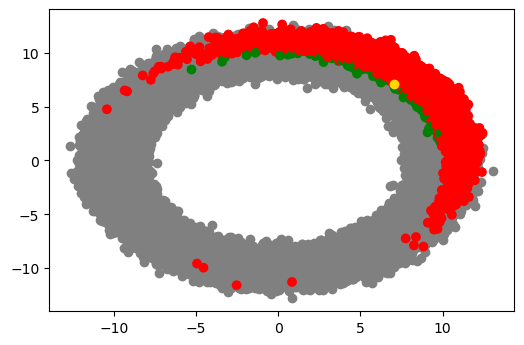

In [324]:
# polar plot
def polar_project(x):
    r = np.sqrt((x**2).sum(axis=1))
    a = np.arctan2(x[:, 0], x[:, 1])
    return r*np.cos(a), r*np.sin(a)

color = np.array(['red', 'green'])[accepted[0, :].astype(int)]
plt.scatter(*polar_project(x), c='gray')
plt.scatter(*polar_project(proposed[0]), c=color)
plt.scatter(*polar_project(x0), c='gold')
plt.show()

In [180]:
def rw_metropolis_sampler_debug(logpdf, x0, steps=100):
    n, d = x0.shape
    x0_lp = logpdf(x0)
    proposed = np.zeros([n, steps, d])
    accepted = np.zeros([n, steps], dtype=bool)

    for i in range(steps):
        # propose new position (x1)
        dx = np.random.normal(0, 0.5, size=[n, d])
        x1 = x0 + dx
        x1_lp = logpdf(x1)
        
        # decide whether to accept new position
        u_lp = np.log(np.random.uniform(size=n))
        accept = u_lp < x1_lp - x0_lp
        
        # update output arrays
        proposed[:, i] = x1
        accepted[:, i] = accept
        
        # update current postion (x0)
        # x0[accept] = x1[accept]
        # x0_lp[accept] = x1_lp[accept]
    
    return proposed, accepted

In [321]:
# generate samples from a high-dimensional multivaria-gaussian
d = 100
n = 100_000
x = np.random.normal(size=[n, d])

# mcmc
logpdf = lambda x: norm(0, 1).logpdf(x).sum(axis=1)
x0 = np.ones([1, d])
proposed, accepted = rw_metropolis_sampler_debug(logpdf, x0, 10_000)

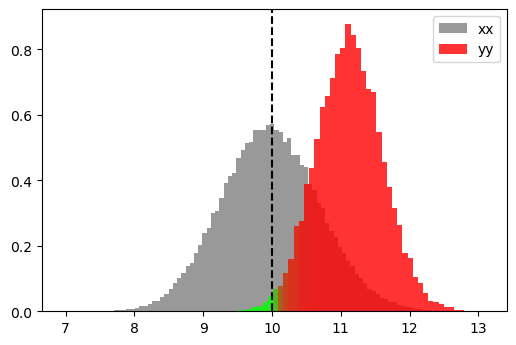

In [323]:
# radial plot
def radius(x):
    return np.sqrt((x**2).sum(axis=1))

# samples draw directly from the target distribution
plt.hist(radius(x), density=True, bins=100, alpha=0.8, color='gray', label='xx')

# x0 (current position in the chain)
plt.axvline(radius(x0), c='black', ls="--")

# dx (proposals generated for the given position)
# - compute the histogram
nbins = 50
pr = radius(proposed[0])
hy, hx = np.histogram(pr, bins=nbins, density=True)
# - compute the proposal ratio for each bin
bin_idx = np.digitize(pr, hx)
ratios = np.zeros(nbins)
for i in range(nbins):
    idx = np.where(bin_idx == i)[0]
    if len(idx) > 0:
        ratios[i] = accepted[0, idx].mean()
color = np.stack([1-ratios, ratios, 0*ratios], 1)
# - plot the histogram
hx0 = hx[:-1]
hx1 = hx[1:]
hw = hx1 - hx0
plt.bar(hx0, hy, hw, color=color, alpha=0.8, label='yy')

# legend
plt.legend()
plt.show()

# plt.scatter(xp[:, 0], xp[:, 1], c='gray')
# color = np.array(['green', 'red'])[accepted[0, :].astype(int)]
# plt.scatter(pp[:, 0], pp[:, 1], c=color)
# plt.scatter(x0p[:, 0], x0p[:, 1], c='gold')
# plt.show()